In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Новая таблица - Лист1.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Dec 06, 2023",77.06,77.63,74.12,74.43,74.43,"30,868"
1,"Dec 05, 2023",78.20,79.07,76.98,77.20,77.20,"32,582"
2,"Dec 04, 2023",79.43,79.66,77.52,78.03,78.03,"32,582"
3,"Dec 01, 2023",80.47,81.52,78.75,78.88,78.88,"29,551"
4,"Nov 30, 2023",82.87,84.71,82.67,82.83,82.83,"59,32"


In [4]:
df['curs_dollara'] = (df['Open'] + df['High']) / 2

In [28]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,curs_dollara
0,"Dec 06, 2023",77.06,77.63,74.12,74.43,74.43,30.868,77.345
1,"Dec 05, 2023",78.20,79.07,76.98,77.20,77.20,32.582,78.635
2,"Dec 04, 2023",79.43,79.66,77.52,78.03,78.03,32.582,79.545
3,"Dec 01, 2023",80.47,81.52,78.75,78.88,78.88,29.551,80.995
4,"Nov 30, 2023",82.87,84.71,82.67,82.83,82.83,59.32,83.790


In [27]:
df['Volume'] = df['Volume'].str.replace(',', '.')

In [30]:
df = df.drop(169)

In [31]:
df['Volume'] = pd.to_numeric(df['Volume'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 252
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          252 non-null    object 
 1   Open          252 non-null    float64
 2   High          252 non-null    float64
 3   Low           252 non-null    float64
 4   Close*        252 non-null    float64
 5   Adj Close**   252 non-null    float64
 6   Volume        252 non-null    float64
 7   curs_dollara  252 non-null    float64
dtypes: float64(7), object(1)
memory usage: 17.7+ KB


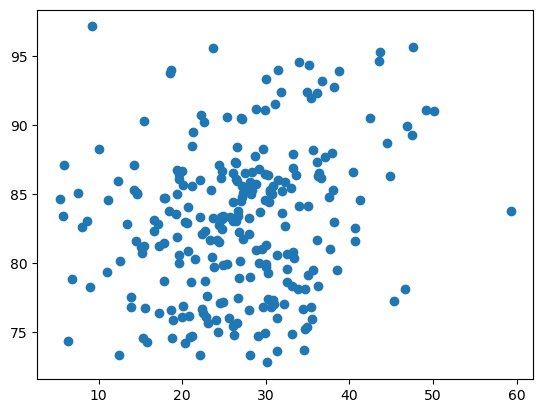

In [33]:
plt.scatter(df['Volume'], df['curs_dollara'])

In [35]:
from sklearn.model_selection import train_test_split

In [43]:
X, y = df[['Volume']], df['curs_dollara']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
model.coef_

array([0.12378109])

In [49]:
model.intercept_

79.76006501832427

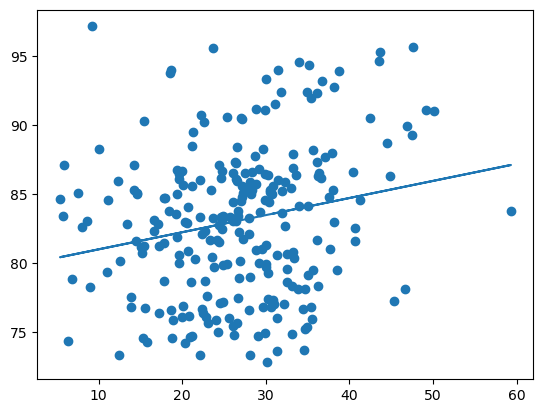

In [51]:
plt.scatter(df['Volume'], df['curs_dollara'])
plt.plot(X, model.predict(X))

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mean_squared_error(y_test, model.predict(X_test))

21.881025871581272